<a href="https://colab.research.google.com/github/Whaleman0423/Deep_Learning_model/blob/main/CNN_models_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model

# AlexNet :

In [2]:
model = Sequential([
            Conv2D(96, (11,11), strides=(4,4), input_shape=(224,224,3), activation='relu'),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            Conv2D(256, (5,5), strides=(1,1), padding='same', activation='relu'),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            Conv2D(384, (3,3), strides=(1,1), padding='same', activation='relu'),
            Conv2D(384, (3,3), strides=(1,1), padding='same', activation='relu'),
            Conv2D(384, (3,3), strides=(1,1), padding='same', activation='relu'),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            Flatten(),
            Dense(4096, activation='relu'),
            Dropout(0.5),
            Dense(4096, activation='relu'),
            Dropout(0.5),
            Dense(1000, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 384)       1

# VGG16 :

In [3]:
model = Sequential([
            Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(224,224,3)),
            Conv2D(64, (3,3), padding='same', activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            
            Conv2D(128, (3,3), padding='same', activation='relu'),
            Conv2D(128, (3,3), padding='same', activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            
            Conv2D(256, (3,3), padding='same', activation='relu'),
            Conv2D(256, (3,3), padding='same', activation='relu'),
            Conv2D(256, (3,3), padding='same', activation='relu'),
            MaxPooling2D(pool_size=(2,2)),

            Conv2D(512, (3,3), padding='same', activation='relu'),
            Conv2D(512, (3,3), padding='same', activation='relu'),
            Conv2D(512, (3,3), padding='same', activation='relu'),
            MaxPooling2D(pool_size=(2,2)),

            Conv2D(512, (3,3), padding='same', activation='relu'),
            Conv2D(512, (3,3), padding='same', activation='relu'),
            Conv2D(512, (3,3), padding='same', activation='relu'),
            MaxPooling2D(pool_size=(2,2)),

            Flatten(),
            Dense(4096, activation='relu'),
            Dropout(0.5),
            Dense(4096, activation='relu'),
            Dropout(0.5),
            Dense(1000, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 256)      

#GooLeNet / InceptionV1 :

In [3]:
def inception(x, nb_filter):
  branch1x1 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)

  branch3x3 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)
  branch3x3 = Conv2D(nb_filter, (3,3), padding='same', activation='relu')(branch3x3)

  branch5x5 = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(x)
  branch5x5 = Conv2D(nb_filter, (5,5), padding='same', activation='relu')(branch5x5)
  
  branchpool = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x)
  branchpool = Conv2D(nb_filter, (1,1), padding='same', activation='relu')(branchpool)

  x = concatenate([branch1x1, branch3x3, branch5x5, branchpool], axis=-1)
  return x

inputs = Input(shape=(224, 224, 3))
x = Conv2D(64, (7,7), padding='same', strides=(2,2), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = Conv2D(192, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x, 64)
x = inception(x, 120)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(x)
x = inception(x, 128)
x = inception(x, 128)
x = inception(x, 128)
x = inception(x, 132)
x = inception(x, 208)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = inception(x, 208)
x = inception(x, 256)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='softmax')(x)
model = Model(inputs, x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 56, 56, 64)   0           conv2d_56[0][0]                  
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 56, 56, 192)  110784      max_pooling2d_13[0][0]           
____________________________________________________________________________________________

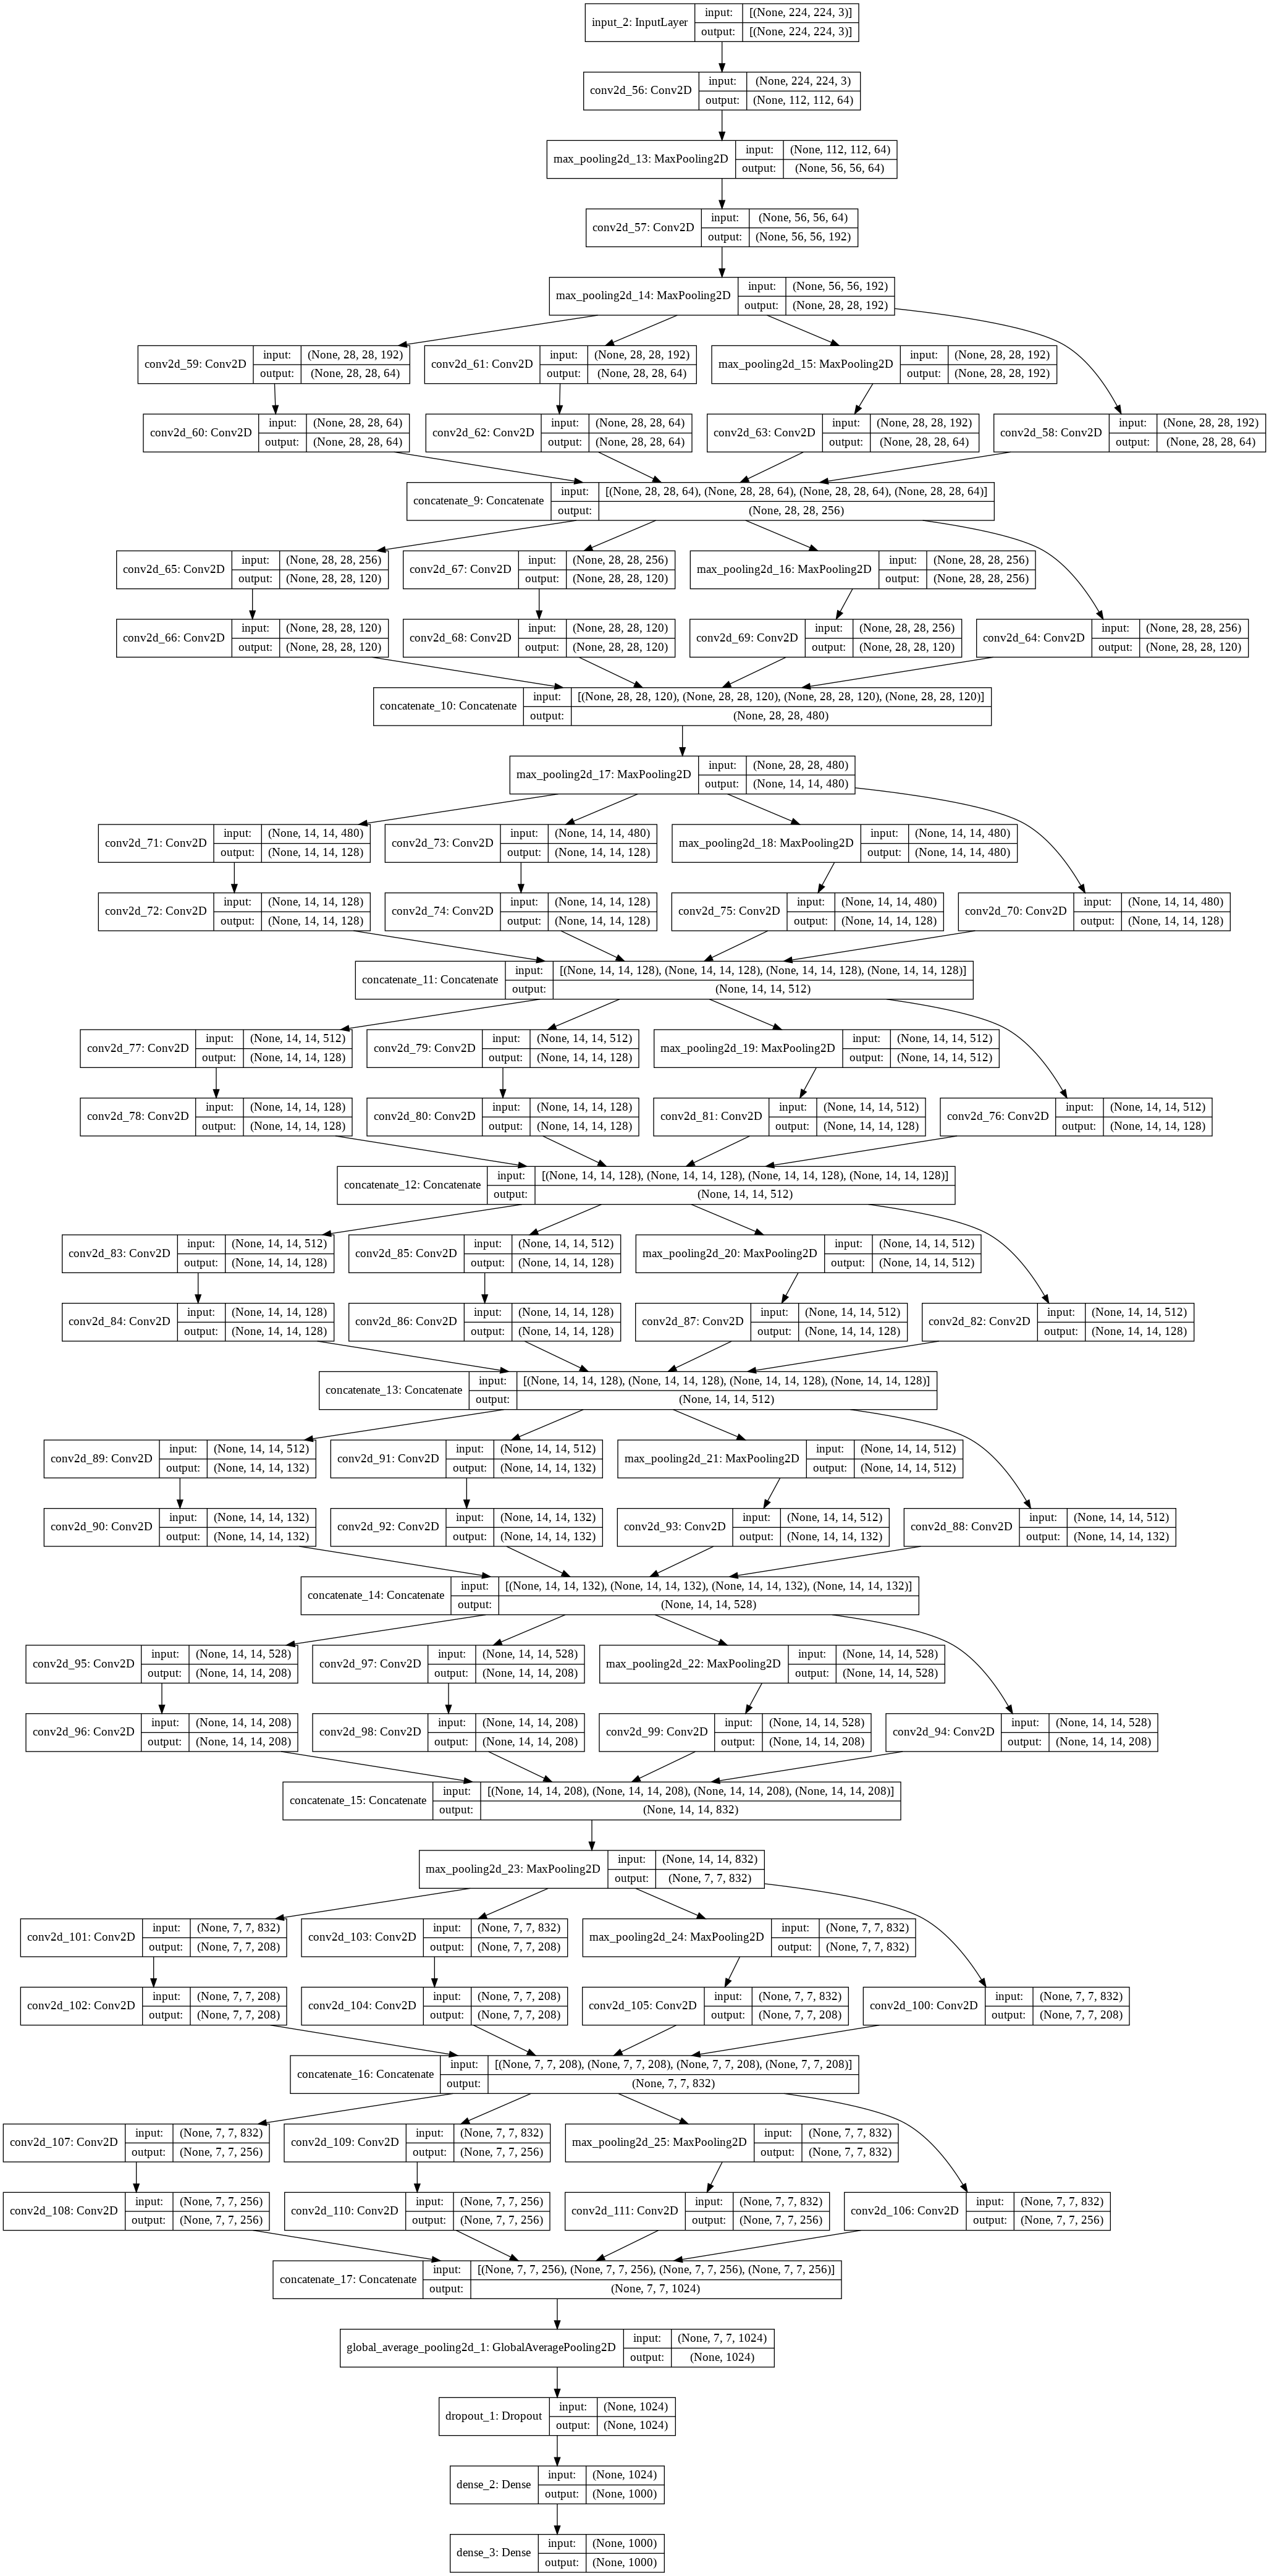

In [4]:
plot_model(model, show_shapes=True)